<a href="https://colab.research.google.com/github/ysy2000/github-slideshow/blob/master/sound_randomize!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import math
import librosa
import librosa.display
import wave

In [2]:
# !pip install librosa

In [3]:
# !pip install torchaudio
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
music_file = 'trumpet'
file_path = '/content/drive/My Drive/Colab Notebooks/'+music_file+'.wav'
# file_path = '/content/drive/My Drive/Colab Notebooks/cut_violinA4.wav'

In [98]:
fig_size = (15, 10)
data, sr = librosa.load(file_path, sr = None)
print(sr, data.shape)

44100 (150912,)


Text(0.5, 1.0, 'waveform')

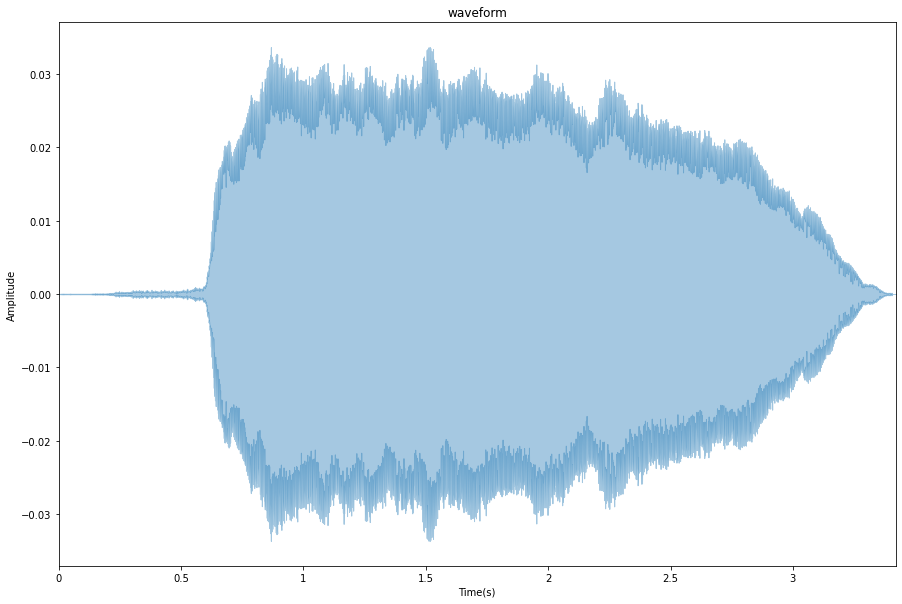

In [99]:
plt.figure(figsize=fig_size)
librosa.display.waveplot(data, sr, alpha=0.4)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("waveform")

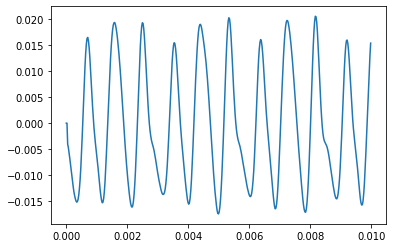

In [100]:
arr = [0,0]
for i in range(441-2):
  arr.append(data[i+sound_index])

times = np.arange(0, 0.01, 1/sr)
plt.plot(times, arr)

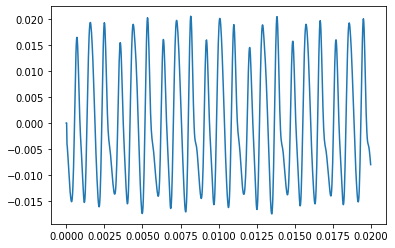

In [101]:
# plot
# 워낙 낮은 음이라 조절
sound_index = 120000
arr = [0,0]
for i in range((2*441)-2):
  arr.append(data[i+sound_index])

times = np.arange(0, 0.02, 1/sr)
plt.plot(times, arr)

In [102]:

fft = np.fft.fft(data)
print("fft shape:", fft.shape)

spectrum = np.abs(fft)
print("spectrum shape:", spectrum.shape)

freq = np.linspace(0, sr, len(spectrum))
print("frequency shape:", freq.shape)

half_spectrum = spectrum[:int(len(spectrum)/2)]
half_freq = freq[:int(len(spectrum)/2)]
print('half_spectrum shape: ', half_spectrum.shape)
print("half frequency shape:", half_freq.shape)

fft shape: (150912,)
spectrum shape: (150912,)
frequency shape: (150912,)
half_spectrum shape:  (75456,)
half frequency shape: (75456,)


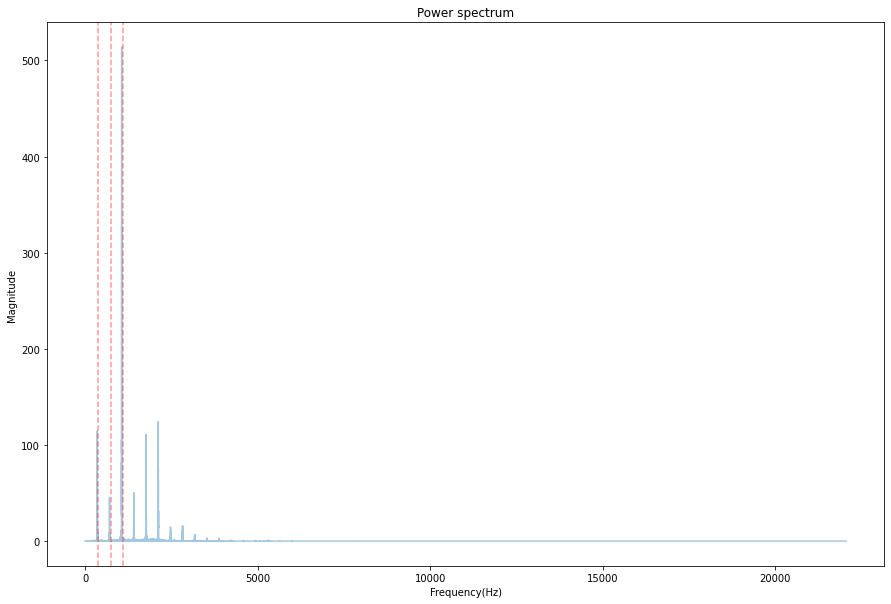

In [105]:
plt.figure(figsize = fig_size)
plt.plot(half_freq, half_spectrum, alpha = 0.4)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
# F#4(369) for trumpet, G3(196) for alto_saxophone
f0= 369
plt.axvline(x=f0, color='r', linestyle='--', alpha = 0.4)
plt.axvline(x=f0*2, color='r', linestyle='--', alpha = 0.4)
plt.axvline(x=f0*3, color='r', linestyle='--', alpha = 0.4)

In [106]:
phase = np.angle(fft)*180/np.pi
print("phase shape:", phase.shape)

angle = np.linspace(0, sr, len(phase))
print("angle shape:", angle.shape)

half_phase = phase[:int(len(phase)/2)]
half_angle = angle[:int(len(phase)/2)] 
print("half phase shape:", half_phase.shape)
print("half angle shape:", half_angle.shape)

phase shape: (150912,)
angle shape: (150912,)
half phase shape: (75456,)
half angle shape: (75456,)


Text(0.5, 1.0, 'Phase')

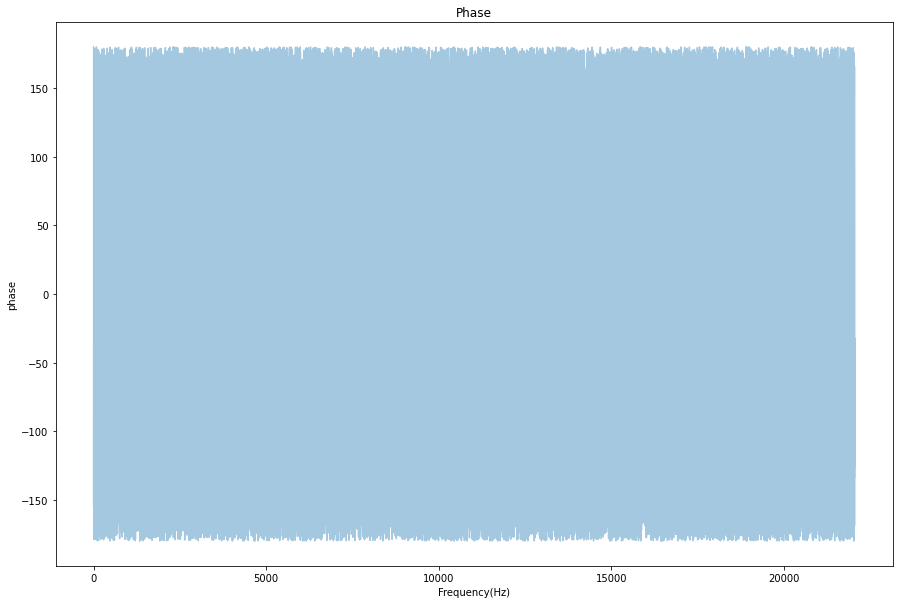

In [107]:
plt.figure(figsize = fig_size)
plt.plot(half_angle, half_phase, alpha = 0.4)
plt.xlabel("Frequency(Hz)")
plt.ylabel("phase")
plt.title("Phase")

# plt.axvline(x=440, color='r', linestyle='--')

In [108]:
half_phase

array([ 180.        ,  -48.54276835, -154.77191965, ..., -168.79959527,
        -31.94131834, -133.6344947 ])

In [109]:
len(half_phase)

75456

In [110]:
phase = 180 * np.random.rand(len(phase))

Text(0.5, 1.0, 'New Phase')

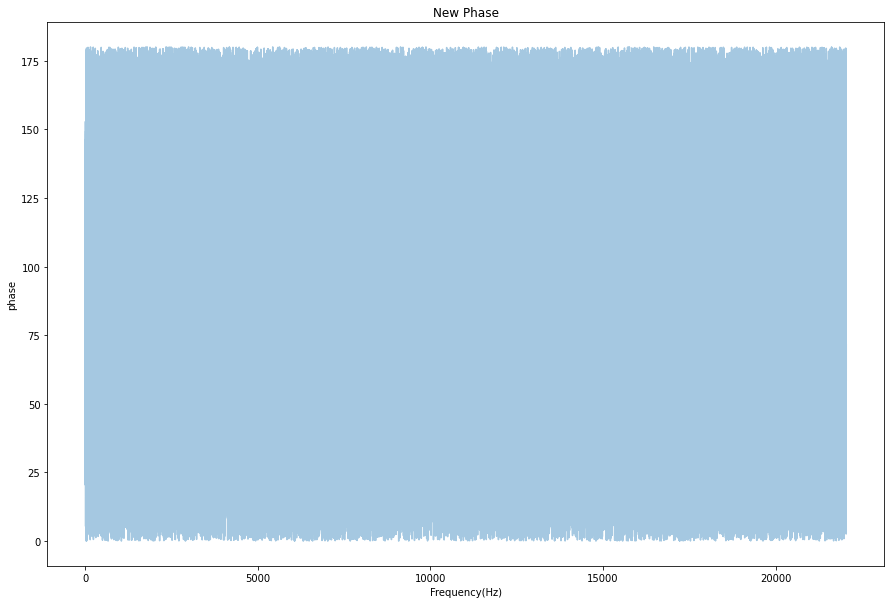

In [111]:
plt.figure(figsize = fig_size)
half_phase = phase[:int(len(phase)/2)]
plt.plot(half_angle, half_phase, alpha = 0.4)
plt.xlabel("Frequency(Hz)")
plt.ylabel("phase")
plt.title("New Phase")

# plt.axvline(x=440, color='r', linestyle='--')

In [112]:
new_furier_data = spectrum*np.exp(-1j*np.pi*phase)
new_data = np.fft.ifft(new_furier_data)

Text(0.5, 1.0, 'waveform')

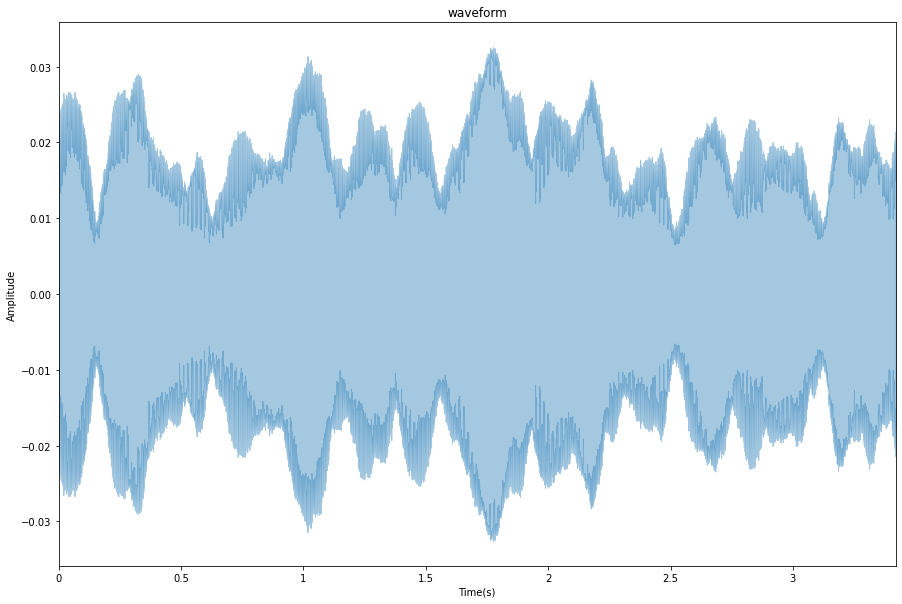

In [113]:
plt.figure(figsize=fig_size)
librosa.display.waveplot(abs(new_data), sr, alpha=0.4)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("waveform")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


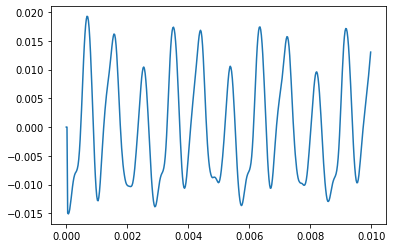

In [114]:
arr = [0,0]
for i in range(441-2):
  arr.append(new_data[i+sound_index])

times = np.arange(0, 0.01, 1/sr)
plt.plot(times, arr)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


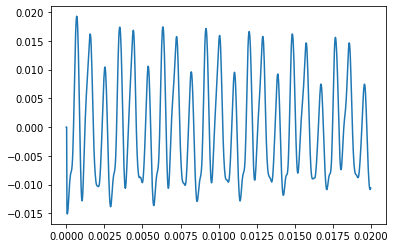

In [115]:
arr = [0,0]
for i in range((2*441)-2):
  arr.append(new_data[i+sound_index])

times = np.arange(0, 0.02, 1/sr)
plt.plot(times, arr)

In [116]:
new_file_path = '/content/drive/My Drive/Colab Notebooks/new_'+music_file+'.wav'

In [117]:
sf.write(new_file_path, data, sr, subtype='PCM_24')

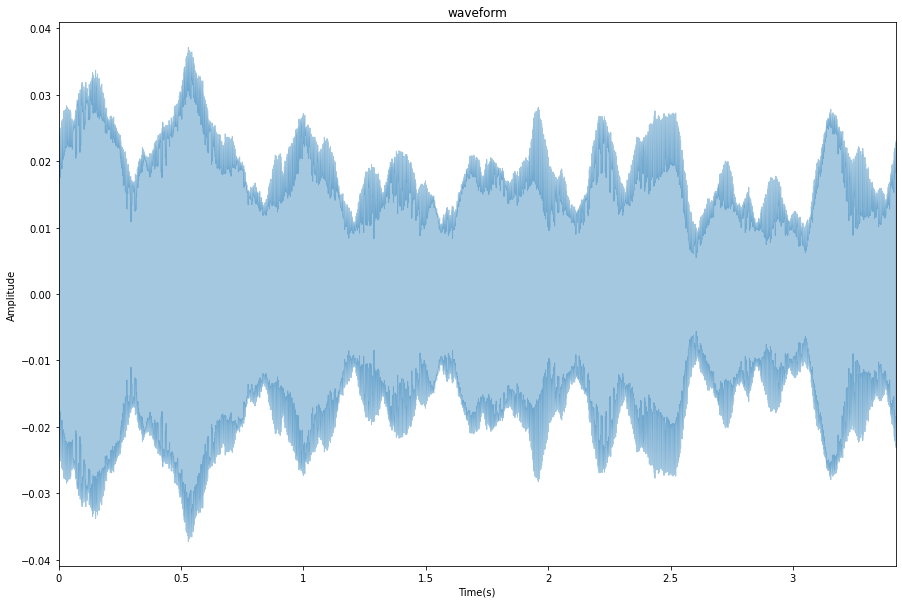

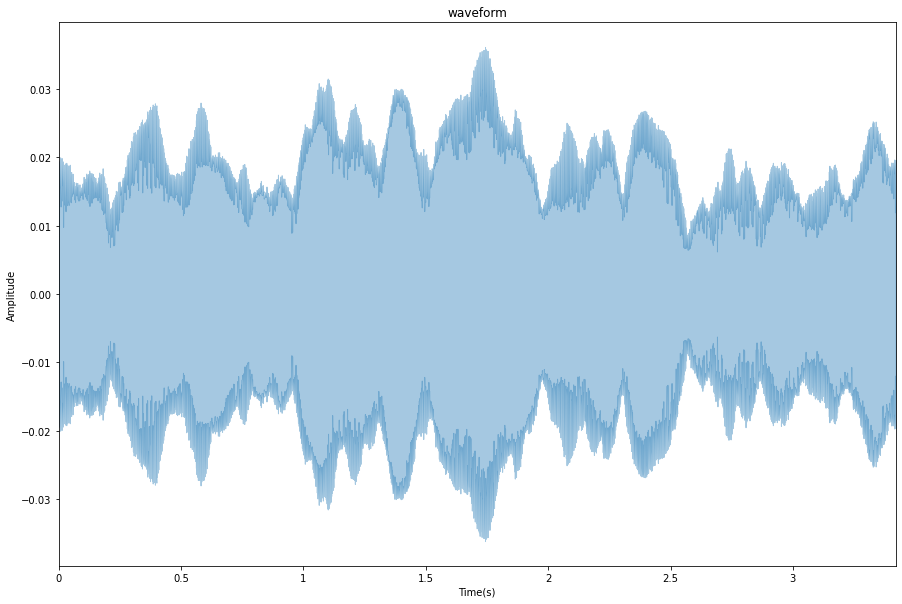

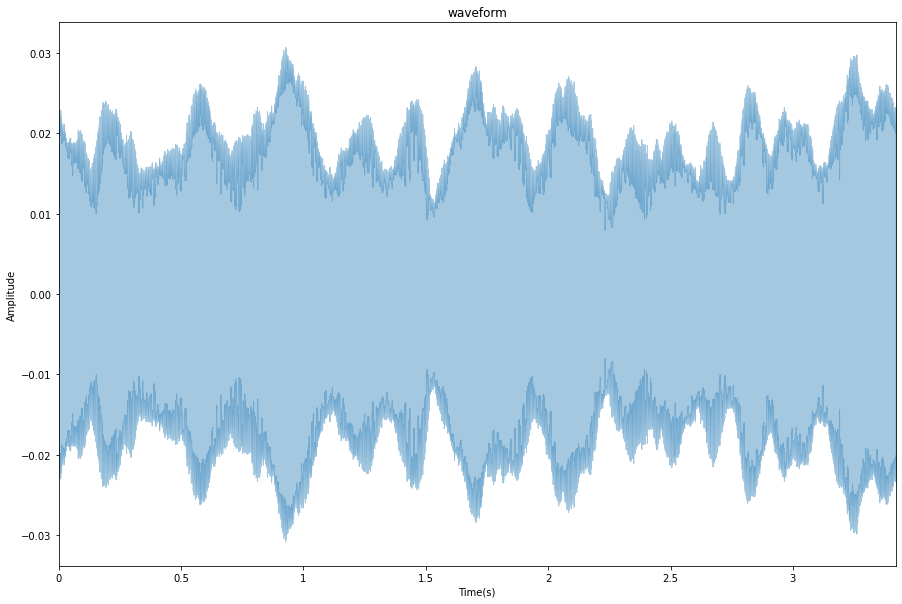

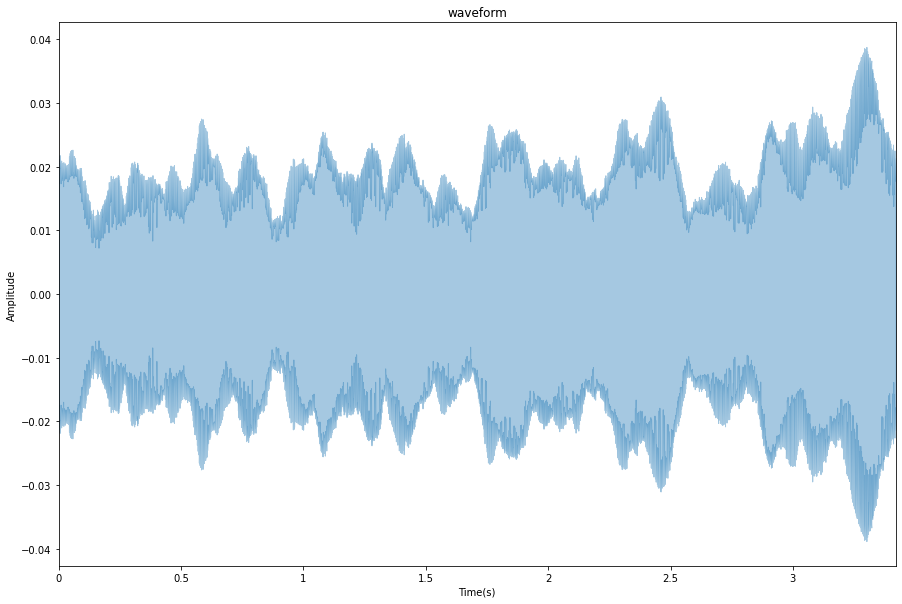

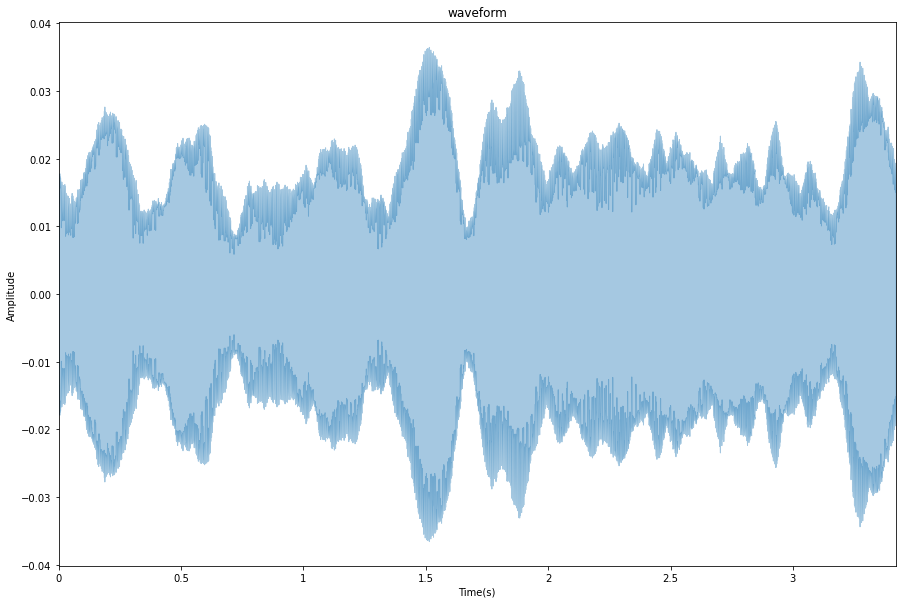

In [118]:
for index in range(5):
  phase = 180 * np.random.rand(len(phase))
  new_furier_data = spectrum*np.exp(-1j*np.pi*phase)
  new_data = np.fft.ifft(new_furier_data)
  plt.figure(figsize=fig_size)
  librosa.display.waveplot(abs(new_data), sr, alpha=0.4)
  plt.xlabel("Time(s)")
  plt.ylabel("Amplitude")
  plt.title("waveform")
  file_name = '/content/drive/MyDrive/Colab Notebooks/'+music_file+ str(index+1)
  # sf.write(file_name +'.wav', data, sr, subtype='PCM_24')

In [119]:
! git init

Initialized empty Git repository in /content/.git/


In [120]:
! git config --global user.name "ysy2000"
! git config --global user.email "suyeonyun564@gmail.com"

In [121]:
! git config user.name

ysy2000


In [ ]:
! git config user.email

suyeonyun564@gmail.com


In [ ]:
!git fetch

In [ ]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add -A

In [ ]:
!git commit -m original

[master (root-commit) a16c379] original
 1910 files changed, 52652 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.07.01/13.40.56.775713.log
 create mode 100644 .config/logs/2021.07.01/13.41.17.729047.log
 create mode 100644 .config/logs/2021.07.01/13.41.33.930553.log
 create mode 100644 .config/logs/2021.07.01/13.41.40.038589.log
 create mode 100644 .config/logs/2021.07.01/13.41.56.945079.log
 create mode 100644 .config/logs/2021.07.01/13.41.57.665710.log
 create mode 100644 drive/MyDrive/Colab Notebooks/ second challenge
 create mode 100644 "drive/MyDrive/Colab Notebooks/ second challenge\341\204\213\341\205\264 \341\204\211\341\205\241\341\204\207\341

In [ ]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   "drive/MyDrive/Colab Notebooks/sound_randomized_by_librosa\341\204\213\341\205\264 \341\204\211\341\205\241\341\204\207\341\205\251\341\206\253"

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git fetch

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/ysy2000/phase_radomize
 * [new branch]      main       -> origin/main


In [ ]:
!git remote add original https://github.com/ysy2000/phase_radomize.git
!git branch -M main
!git push -u original main

fatal: remote original already exists.
fatal: could not read Username for 'https://github.com': No such device or address
